# Image Denoising Challenge

The goal for this challenge is to leverage your knowledge of Deep Learning to design and train a denoising model. For a given noisy image $X$, our model should learn to predict the denoised image $y$.


**Objectives**
- Visualize images
- Preprocess images for the neural network
- Fit a custom CNN for the task

## 1. Load Data

👉 Let's download the dataset archive.
It contains RGB and Black & White images we will be using for the rest of this challenge.

In [104]:
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import PIL
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [5]:
# ! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/paintings.zip > paintings.zip
! unzip -nq "paintings.zip" 
! rm "paintings.zip"
! ls -l

total 84
-rwxrwxrwx 1 gaetan gaetan 21101 Jun 30 09:25 image_denoising.ipynb
drwx------ 2 gaetan gaetan 57344 Jun  9 15:06 paintings
-rw-r--r-- 1 gaetan gaetan     0 Jun 29 09:21 README.md
drwxr-xr-x 2 gaetan gaetan  4096 Jun 29 09:21 tests


In [6]:
dataset_paths = glob.glob("./paintings/*.jpg")
dataset_paths

['./paintings/Kazimir_Malevich_13.jpg',
 './paintings/Jan_van_Eyck_15.jpg',
 './paintings/Albrecht_Duâ\x95\xa0Ãªrer_34.jpg',
 './paintings/Edgar_Degas_271.jpg',
 './paintings/Titian_45.jpg',
 './paintings/Paul_Gauguin_65.jpg',
 './paintings/Andy_Warhol_89.jpg',
 './paintings/Pierre-Auguste_Renoir_151.jpg',
 './paintings/Pablo_Picasso_120.jpg',
 './paintings/Vincent_van_Gogh_305.jpg',
 './paintings/Pablo_Picasso_186.jpg',
 './paintings/Pablo_Picasso_63.jpg',
 './paintings/Albrecht_DuÌ\x88rer_244.jpg',
 './paintings/Frida_Kahlo_87.jpg',
 './paintings/Vincent_van_Gogh_558.jpg',
 './paintings/Pablo_Picasso_14.jpg',
 './paintings/Rene_Magritte_94.jpg',
 './paintings/El_Greco_63.jpg',
 './paintings/Gustav_Klimt_104.jpg',
 './paintings/Paul_Gauguin_12.jpg',
 './paintings/Vasiliy_Kandinskiy_57.jpg',
 './paintings/Edgar_Degas_228.jpg',
 './paintings/Marc_Chagall_101.jpg',
 './paintings/Pierre-Auguste_Renoir_57.jpg',
 './paintings/Leonardo_da_Vinci_50.jpg',
 './paintings/Rene_Magritte_50.jpg'

❓ **Display the image at index `53` of this dataset_paths (i.e the 54-th image)**

<details>
    <summary>Hint</summary>
    Use the <code>PIL.Image.open</code> and <code>matplotlib.pyplot.imshow</code> functions.
</details>

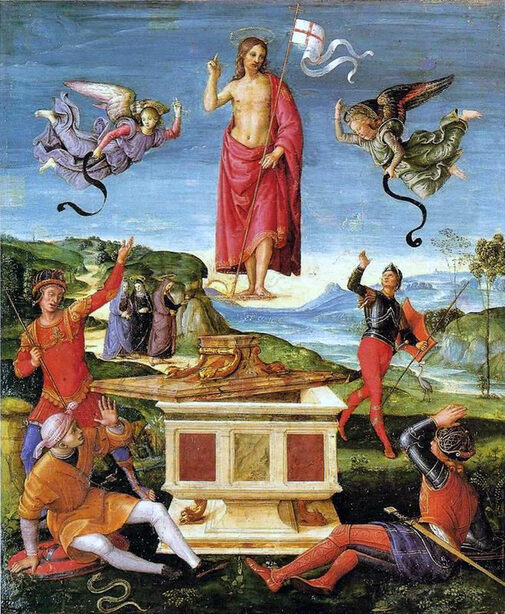

In [20]:
image = PIL.Image.open(dataset_paths[54])

image

❓ **What is the shape of the image you displayed above `img_shape`?  How many dimensions `img_dim` does it have ?**

In [16]:
img_shape = PIL.Image.open(dataset_paths[54]).size

img_dim = 3
# A colored image is composed of 3 channels

❓ **What was in the image above?**

In [18]:
img_shape = img_shape
img_dim = img_dim

# Uncomment the correct answer

#is_portrait = True
is_portrait = False

is_colored_image = True
#is_colored_image = False

In [19]:
from nbresult import ChallengeResult
result = ChallengeResult(
    'data_loading',
    img_shape=img_shape,
    img_dim=img_dim,
    is_portrait=is_portrait,
    is_colored_image=is_colored_image
)

result.write()

## 2. Processing

❓ **Store all images from the dataset folder in a list of numpy arrays called `dataset_images`**

- It can take a while
- If the dataset is too big to fit in memory, just take the first half (or quarter) of all pictures

In [38]:
i = 0
dataset = []
for _file in range(0, len(dataset_paths)):
    img = PIL.Image.open(dataset_paths[_file])  # this is a PIL image
    # img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    x = np.array(img)  
    # x = x.reshape((3, 120, 160))
    # Normalize
    # x = (x - 128.0) / 128.0
    dataset.append(x)
    i += 1
    if i % 250 == 0:
        print("%d images to array" % i)
print("All images to array!")

250 images to array
500 images to array
750 images to array
1000 images to array
All images to array!


In [40]:
dataset_images = np.array(dataset)

<ipython-input-40-9b068172461d>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  dataset_images = np.array(dataset)


In [47]:
dataset_images[3].shape

(491, 671, 3)

### 2.1 Reshape, Resize, Rescale

Let's simplify our dataset and convert it to a single numpy array

❓ **First, check if that all the images in the dataset have the same number of dimensions**.
- What do you notice?
- How do you explain it? 

In [50]:
for image in dataset_images[:50]:
    print(dataset_images[image].shape)

(360, 283, 3)
(614, 436, 3)
(614, 449, 3)
(491, 671, 3)
(614, 474, 3)
(674, 511, 3)
(310, 300, 3)
(483, 768, 3)
(494, 329, 3)
(720, 502, 3)
(466, 394, 3)
(240, 191, 3)
(1229, 918)
(484, 352, 3)
(614, 292, 3)
(614, 473, 3)
(324, 484, 3)
(293, 484, 3)
(960, 682, 3)
(467, 583, 3)
(401, 403, 3)
(614, 478, 3)
(461, 358, 3)
(614, 461, 3)
(623, 483, 3)
(484, 319, 3)
(823, 614, 3)
(568, 430, 3)
(653, 478, 3)
(536, 604, 3)
(463, 614, 3)
(917, 1634, 3)
(676, 553, 3)
(540, 470, 3)
(363, 480, 3)
(689, 510, 3)
(600, 344, 3)
(614, 494)
(440, 441, 3)
(600, 500, 3)
(614, 391, 3)
(484, 374, 3)
(600, 247, 3)
(540, 435, 3)
(768, 577)
(427, 900, 3)
(362, 293, 3)
(484, 378, 3)
(671, 484, 3)
(826, 1229)


> Some images don't have 3 channels : they are black & white

👉 We convert for you all black & white images into 3-colored ones by duplicating the image on three channels, so as to have only 3D arrays

In [55]:
dataset_images = [x if x.ndim==3 else np.repeat(x[:,:,None], 3, axis=2) for x in tqdm(dataset_images)]
set([x.ndim for x in dataset_images])

100%|██████████| 1085/1085 [00:00<00:00, 1740.45it/s]


{3}

❓ **What about their shape now ?**
- Do they all have the same width/heights ? If not:
- Resize the images (120 pixels height and 100 pixels width) in the dataset, using `tensorflow.image.resize` function.
- Now that they all have the same shape, store them as a numpy array `dataset_resized`.
- This array should thus be of size $(n_{images}, 120, 100, 3)$

In [75]:
from tensorflow.image import resize

In [81]:
resized_images = []
for image in dataset_images:
    resized_images.append(resize(image, [120,100]))
    
dataset_resized = np.array(resized_images)

In [83]:
dataset_resized.shape

(1085, 120, 100, 3)

❓ **Rescale the data of each image between $0$ and $1$**
- Save your resulting list as `dataset_scaled`

In [89]:
dataset_scaled = dataset_resized / 255

In [95]:
print('Min : {} & Max : {}'.format(dataset_scaled.min(), dataset_scaled.max()))

Min : 0.0 & Max : 1.0


In [96]:
print(type(dataset_scaled), dataset_scaled.shape)

<class 'numpy.ndarray'> (1085, 120, 100, 3)


### 2.2 Create (X,y) sets

👉 Now, we'll add for you some **random noise** to our images to simulate noise (that our model will try to remove later)

In [97]:
NOISE_LEVEL = 0.2

dataset_noisy = np.clip(
    dataset_scaled + np.random.normal(
        loc=0,
        scale=NOISE_LEVEL,
        size=dataset_scaled.shape
    ).astype(np.float32),
    0,
    1
)
dataset_noisy.shape

(1085, 120, 100, 3)

❓ **Plot a noisy image below to visualize the noise and compare it with the normal one**

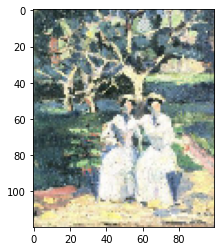

In [101]:
plt.imshow(dataset_scaled[0], cmap='Greys')

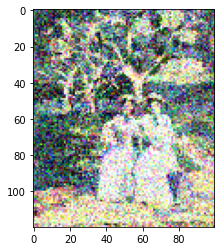

In [102]:
plt.imshow(dataset_noisy[0], cmap='Greys')

❓ **Create your `(X_train, Y_train)`, `(X_test, Y_test)` training set for your problem**

- Remember you are trying to use "noisy" pictures in order to predict the "normal" ones.
- Keeping about `20%` of randomly sampled data as test set

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset_noisy, dataset_scaled, test_size=0.20, random_state=42)

In [108]:
from nbresult import ChallengeResult
result = ChallengeResult(
    "preprocessing",
    X_train_shape = X_train.shape,
    Y_train_shape = Y_train.shape,
    X_std = X_train[:,:,:,0].std(),
    Y_std = Y_train[:,:,:,0].std(),
    first_image = Y_train[0]
)
result.write()

## 3. Convolutional Neural Network

A commonly used neural network architecture for image denoising is the __AutoEncoder__.

<img src='https://github.com/lewagon/data-images/blob/master/DL/autoencoder.png?raw=true'>

Its goal is to learn a compact representation of your data to reconstruct them as precisely as possible.  
The loss for such model must incentivize it to have __an output as close to the input as possible__.

For this challenge, __you will only be asked to code the Encoder part of the network__, since building a Decoder leverages layers architectures you are not familiar with (yet).

👉 Run this code below if you haven't managed to build your own (X,Y) training sets. This will load them as solution

```python
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)
    
! rm data_painting_solution.pickle
```

### 3.1 Architecture

👉 Run the cell below that defines the decoder

In [110]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Sequential

In [114]:
# We choose to compress images into a latent_dimension of size 6000
latent_dimensions = 6000

# We build a decoder that takes 1D-vectors of size 6000 to reconstruct images of shape (120,100,3)
decoder = Sequential(name='decoder')
decoder.add(layers.Reshape((30, 25, 8), input_dim=latent_dimensions))
decoder.add(layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2D(filters=3, kernel_size=3, padding="same", activation="sigmoid"))
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 30, 25, 8)         0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 60, 50, 16)        1168      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 120, 100, 32)      4640      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 100, 3)       867       
Total params: 6,675
Trainable params: 6,675
Non-trainable params: 0
_________________________________________________________________


❓ **Now, build the `encoder` that plugs correctly with the decoder defined above**. Make sure that:
- The output of your `encoder` is the same shape as the input of the `decoder`
- Use a convolutional neural network architecture without transfer learning
- Keep it simple
- Print model summary

In [118]:
# CODE HERE YOUR ENCODER ARCHITECTURE AND PRINT IT'S MODEL SUMMARY
def build_encoder(latent_dimension):
    encoder = Sequential(name='encoder')
    encoder.add(layers.Conv2D(2, (3,3), input_shape=(120, 100, 3), activation='relu'))
    encoder.add(layers.MaxPooling2D(2))
    
    encoder.add(layers.Conv2D(4, (3, 3), activation='relu'))
    encoder.add(layers.MaxPooling2D(2))
     
    encoder.add(layers.Flatten())
    encoder.add(layers.Dense(latent_dimension, activation='tanh'))
    
    return encoder

In [119]:
encoder = build_encoder(latent_dimensions)

encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 118, 98, 2)        56        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 59, 49, 2)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 57, 47, 4)         76        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 23, 4)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2576)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 6000)              15462000  
Total params: 15,462,132
Trainable params: 15,462,132
Non-trainable params: 0
_______________________________________________

👉 **Test your encoder below**

In [120]:
# HERE WE BUILD THE AUTO-ENCODER (ENCODER + DECODER) FOR YOU. IT SHOULD PRINT A NICE SUMMARY
from tensorflow.keras.models import Model

x = layers.Input(shape=(120, 100, 3))
autoencoder = Model(x, decoder(encoder(x)), name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 120, 100, 3)]     0         
_________________________________________________________________
encoder (Sequential)         (None, 6000)              15462132  
_________________________________________________________________
decoder (Sequential)         (None, 120, 100, 3)       6675      
Total params: 15,468,807
Trainable params: 15,468,807
Non-trainable params: 0
_________________________________________________________________


### 3.2 Training

❓ **Before training the autoencoder, evaluate your baseline score**
- We will use the mean absolute error in this challenge
- Compute the baseline score on your test set in the "stupid" case where you don't manage to de-noise anything at all.
- Store the result under `score_baseline`

In [580]:
# YOUR CODE HERE

❓ Now, **train your autoencoder**

- Use an appropriate loss
- Adapt the learning rate of your optimizer if convergence is too slow/fast
- Make sure your model does not overfit with appropriate control techniques

💡 You will not be judged by the computing power of your computer, you can reach decent performance in less than 5 minutes of training without GPUs.

In [581]:
# YOUR CODE HERE

❓ **Plot your training and validation loss at each epoch using the cell below**

In [583]:
# Plot below your train/val loss history
# YOUR CODE HERE
# YOUR CODE HERE
# YOUR CODE HERE


# Run also this code to save figure as jpg in path below (it's your job to ensure it works)
fig = plt.gcf()
plt.savefig("tests/history.png")

❓ **Evaluate your performances on test set**
- Compute your de-noised test set `Y_pred` 
- Store your test score as `score_test`
- Plot a de-noised image from your test set and compare it with the original and noisy one using the cell below

In [585]:
# YOUR CODE HERE

In [591]:
# RUN THIS CELL TO CHECK YOUR RESULTS
idx = 0

fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(Y_test[idx])
axs[0].set_title("Clean image.")

axs[1].imshow(X_test[idx])
axs[1].set_title("Noisy image.")

axs[2].imshow(Y_pred[idx])
axs[2].set_title("Prediction.")

# Run this to save your results for correction
plt.savefig('tests/image_denoised.png')

🧪 **Send your results below**

In [588]:
from nbresult import ChallengeResult

result = ChallengeResult(
    "network",
    input_shape = list(encoder.input.shape),
    output_shape = list(encoder.output.shape),
    layer_names = [layer.name for layer in encoder.layers],
    trainable_params = sum([tf.size(w_matrix).numpy() for w_matrix in encoder.trainable_variables]),
    score_baseline = score_baseline,
    score_test = score_test,
)
result.write()